# NNIA Assignment 9
**DEADLINE: 26.1.2024 0800 CET**
- Philipp Hawlitschek 7043167 (phha00002)
- William LaCroix 7038732 (wila00001)
- Hours of work per person: 2

# Submission Instructions
**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the submission deadline. All course-related questions can be addressed on the course **CMS Forum**.

* Assignments are to be submitted in a **team of 2-3**. It is fine to submit first **2** assignments without a team, but starting from the **3rd** assignment it is not allowed.
* Please include your **names**, **ID's**, **CMS usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (`.zip` is the only accepted extension) in **CMS**.
* Only **one** member of the group should make the submission.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2(_Name3_id3).zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization repeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>

## 1 Bagging and Dropout (2 points)
Read the relevant sections (7.11 and 7.12) in [Chapter 7](https://www.deeplearningbook.org/contents/regularization.html) of the [deep learning book](https://www.deeplearningbook.org/).
1.  Why can dropout be considered as an approximation to Bagging? Explain in two or three
sentences.
2. Do we apply dropout during the inference? Justify your answer.

### 1 Answers

1. Bagging means that we have multiple separate models that vote for the final prediction. Dropout means that we derive multiple models from just one single original neural network by setting some of the weights to zero. Both techniques introduce randomness and therefore make the prediction more robust and generalizable.
2. Yes, we can apply dropout during inference, but we need to employ some special techniques for that. Since dropout can result in a very large amount of models, it would be computationally too costly for just one prediction. So one way to do it is to limit the number of models to 10 - 20 for example. Another method, which is even computationally cheaper, is to use a scaling factor in the original model to readjust the weights and then run a forward pass using the original model with scaled weights.

## 2 Optimization Algorithms and the Rosenbrock function (5 points) + 1 Bonus
## 2.1 The Rosenbrock function (0.5 points)
The [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function) is a non-convex function that is often used as a test problem for optimization algorithms. It has a global minimum of 0 at the point (1, 1). The function is defined by:
$$f(x, y) =  (a - x)^2 + b(y - x^2)^2$$
where he parameter $a$ determines the location of the global minimum and the parameter $b$ determines the steepness of the valley around the minimum. We will be using the Rosenbrock function to visualize some of Pytorch's built-in optimization algorithms. Implement the Rosenbrock function in Python.
## 2.2 Plotting the Rosenbrock function (1 point)
Next you will be plotting contours the Rosenbrock function with $1$ for the parameters $a$ and $b$. To do this you will need to create:
- A 1d tensor x for the x values that contain 100 evenly spaced numbers from -2 to 2
- A 1d tensor y for the y values that contain 100 evenly spaced numbers from -1 to 3
- Two 2D tensors, X and Y, that represent a rectangular grid of points from the input tensors x and y

Some useful functions for this are:
- [torch.linspace](https://pytorch.org/docs/stable/generated/torch.linspace.html)
- [torch.meshgrid](https://pytorch.org/docs/stable/generated/torch.meshgrid.html)

Now you can begin plotting. Apply the Rosenbrock function to X and Y and plot it using [matplotlib.pyplot.contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html).
## 2.3 Plotting SGD (2 points)
Now you will evaluate and plot SGD on the Rosenbrock function. To this we will start at point $(-0.5,2.5)$ which you will need to create a tensor for (hint: make sure to set `requires_grad` to `True`). This point will present the initial parameters of a model and the Rosenbrock function will represent the loss function. Write an optimization loop for [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) with a learning rate of 0.1. Run it until you reach the minimum of the Rosenbrock function and print how many iterations it took. Your final parameters don't need be exactly equal to the minimum, so you can use [torch.isclose](https://pytorch.org/docs/stable/generated/torch.isclose.html) to check if you've reached it. Finally, plot the parameters (X and Y) of every iteration over the plot from 2.2 and make sure you use a colour that is clearly visible.
## 2.4 SGD with momentum and Adam (1.5 points) + 1 Bonus
Finally, we will compare SGD with two other Algorithms, namely [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) and [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) with momentum, where momentum is 0.3. Follow the steps from 2.3 and plot Adam and SGD with momentum on the Rosenbrock function. What differences do you observe between the three algorithms and how would you explain them?

For 1 bonus point try changing the value of momentum to minimize the number iterations needed to reach the minimum.

In [103]:
################
# Solution 2.1 #
################

def rosenbrock (x:float, y:float) -> float:
    a = 1           # standard setting of the parameter according to Wikipedia
    b = 100         # standard setting of the parameter according to Wikipedia
    return ((a - x)**2) + (b * (y - x**2)**2)

print("Expected value of 0 at point (1,1).")
print(f"{rosenbrock(1,1)}")

Expected value of 0 at point (1,1).
0


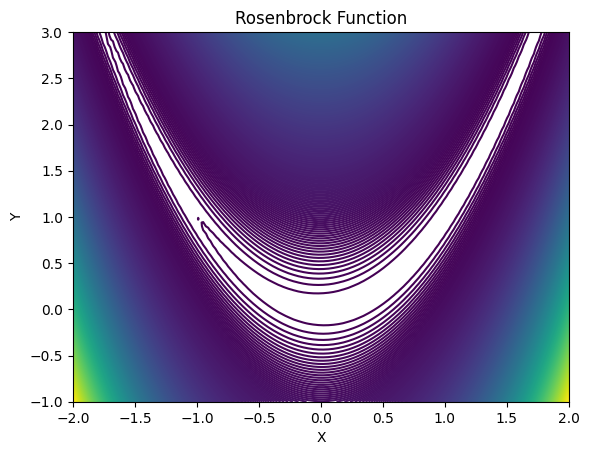

In [104]:
################
# Solution 2.2 #
################

from torch import linspace
from torch import meshgrid
import matplotlib.pyplot as plt

x = linspace(-2, 2, 100)
y = linspace(-1, 3, 100)

#print("Evenly spaced tensor x is:")
#print(x)
#print("Evenly spaced tensor y is:")
#print(y)

X, Y = meshgrid(x, y)

#print("Meshgrid X is:")
#print(X)
#print("Meshgrid Y is:")
#print(Y)

rosenbrock_values = rosenbrock(X, Y)

plt.contour(X, Y, rosenbrock_values, levels=666)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Rosenbrock Function")
plt.show()

In [105]:
################
# Solution 2.3 #
################

from torch import tensor
from torch import no_grad
from torch import isclose
from torch import optim
from torch.nn.utils import clip_grad_norm_

starting_point = tensor([-0.5, 2.5], requires_grad=True)
end_point = tensor(0.0)
lr = 0.1
optimizer = optim.SGD([starting_point], lr=lr)
gradient_clip_threshold = 0.0002
# Explanation about the clipping threshold:
# Without any clipping, we experienced terribly exploding gradients:
# for iteration 1, loss is 434949888.0
# for iteration 2, loss is 2.0213955142478755e+28
# for iteration 3, loss is inf
# for iteration 4, loss is nan
# So we had to play around with different clipping thresholds. This 0.0002 one is already quite tuned!

SGD_path_x = list()
SGD_path_y = list()

iterations = 0
not_converged = True
while not_converged:
    # Compute the Rosenbrock value and gradients
    loss = rosenbrock(starting_point[0], starting_point[1])
    loss.backward()
    

    clip_grad_norm_([starting_point], gradient_clip_threshold)
    
    optimizer.step()
    optimizer.zero_grad()
    
    if isclose(loss, end_point): # checking whether we have reached the end point
        not_converged = False

    iterations += 1 # counting iterations
    if (iterations % 1000 == 0): # printing the loss for visual inspection while running
        print(f"for iteration {iterations}, loss is {loss}")
        SGD_path_x.append(starting_point[0].item())
        SGD_path_y.append(starting_point[1].item())

#print(iterations)

for iteration 1000, loss is 495.8260803222656
for iteration 2000, loss is 483.1196594238281
for iteration 3000, loss is 470.39599609375
for iteration 4000, loss is 457.6572570800781
for iteration 5000, loss is 444.906494140625
for iteration 6000, loss is 432.15325927734375
for iteration 7000, loss is 419.4127197265625
for iteration 8000, loss is 406.67120361328125
for iteration 9000, loss is 393.9342346191406
for iteration 10000, loss is 381.2077941894531
for iteration 11000, loss is 368.50555419921875
for iteration 12000, loss is 355.8416442871094
for iteration 13000, loss is 343.2066345214844
for iteration 14000, loss is 330.6067199707031
for iteration 15000, loss is 318.0584411621094
for iteration 16000, loss is 305.581787109375
for iteration 17000, loss is 293.1633605957031
for iteration 18000, loss is 280.8119201660156
for iteration 19000, loss is 268.56915283203125
for iteration 20000, loss is 256.4170227050781
for iteration 21000, loss is 244.3580780029297
for iteration 22000, l

for iteration 173000, loss is 1.255933165550232
for iteration 174000, loss is 1.2125509977340698
for iteration 175000, loss is 1.1696070432662964
for iteration 176000, loss is 1.1271737813949585
for iteration 177000, loss is 1.0853233337402344
for iteration 178000, loss is 1.0441291332244873
for iteration 179000, loss is 1.0036617517471313
for iteration 180000, loss is 0.9639884233474731
for iteration 181000, loss is 0.9251717329025269
for iteration 182000, loss is 0.8872681260108948
for iteration 183000, loss is 0.8503263592720032
for iteration 184000, loss is 0.8143876791000366
for iteration 185000, loss is 0.7794842720031738
for iteration 186000, loss is 0.745639979839325
for iteration 187000, loss is 0.7128706574440002
for iteration 188000, loss is 0.6811830997467041
for iteration 189000, loss is 0.6505778431892395
for iteration 190000, loss is 0.6210487484931946
for iteration 191000, loss is 0.5925835967063904
for iteration 192000, loss is 0.5651658177375793
for iteration 193000, 

In [106]:
print(f"TOTAL AMOUNTS OF ITERATIONS NEEDED: {iterations}")

TOTAL AMOUNTS OF ITERATIONS NEEDED: 259726


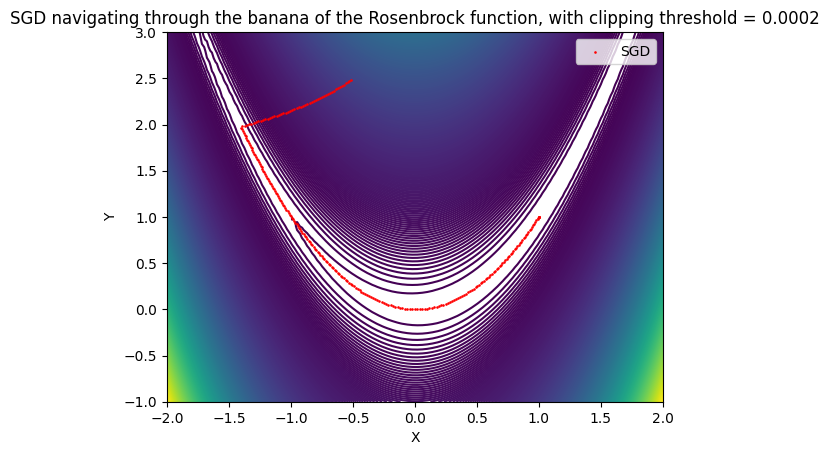

In [108]:
################
# Solution 2.3 # - Plotting
################

plt.contour(X, Y, rosenbrock_values, levels=666, zorder=-1)
plt.scatter(SGD_path_x, SGD_path_y, c="red", zorder=1, label="SGD", s=0.75)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("SGD navigating through the banana of the Rosenbrock function, with clipping threshold = 0.0002")
plt.legend()
plt.show()

In [109]:
################
# Solution 2.4 # - ADAM
################

starting_point = tensor([-0.5, 2.5], requires_grad=True)
end_point = tensor(0.0)
lr = 0.1
optimizer = optim.Adam([starting_point], lr=lr)

#gradient_clip_threshold = 75
# Adam doesn't need clipping necessarily, but it does help!

Adam_path_x = list()
Adam_path_y = list()

iterations = 0
not_converged = True
while not_converged:
    # Compute the Rosenbrock value and gradients
    loss = rosenbrock(starting_point[0], starting_point[1])
    loss.backward()
    
    #clip_grad_norm_([starting_point], gradient_clip_threshold)
    
    optimizer.step()
    optimizer.zero_grad()
    
    if isclose(loss, end_point): # checking whether we have reached the end point
        not_converged = False

    iterations += 1 # counting iterations
    if (iterations % 1000 == 0): # printing the loss for visual inspection while running
        print(f"for iteration {iterations}, loss is {loss}")
    
    Adam_path_x.append(starting_point[0].item())
    Adam_path_y.append(starting_point[1].item())

print(iterations)

for iteration 1000, loss is 0.13472746312618256
for iteration 2000, loss is 0.0008135868120007217
for iteration 3000, loss is 3.21830270877399e-07
3314


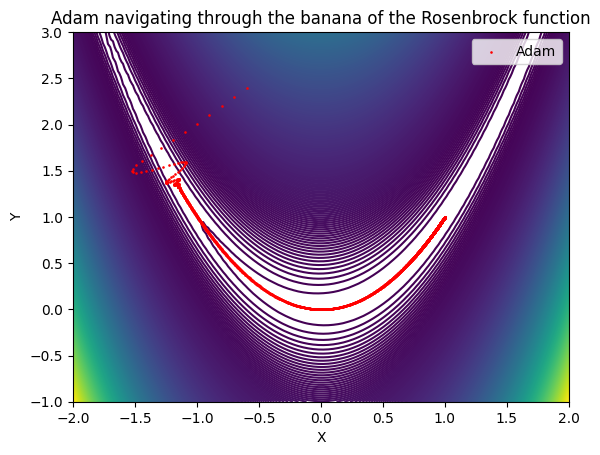

In [110]:
################
# Solution 2.4 # - Plotting Adam
################

plt.contour(X, Y, rosenbrock_values, levels=666, zorder=-1)
plt.scatter(Adam_path_x, Adam_path_y, c="red", zorder=1, label="Adam", s=0.75)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Adam navigating through the banana of the Rosenbrock function")
plt.legend()
plt.show()

In [111]:
################
# Solution 2.4 # - SGD with momentum = 0.3
################

starting_point = tensor([-0.5, 2.5], requires_grad=True)
end_point = tensor(0.0)
lr = 0.1
momentum = 0.3
optimizer = optim.SGD([starting_point], lr=lr, momentum=momentum)

gradient_clip_threshold = 0.0002
# Again, clipping is needed to avoid exploding gradients. 


SGD_w_momentum_path_x = list()
SGD_w_momentum_path_y = list()

iterations = 0
not_converged = True
while not_converged:
    # Compute the Rosenbrock value and gradients
    loss = rosenbrock(starting_point[0], starting_point[1])
    loss.backward()
    
    clip_grad_norm_([starting_point], gradient_clip_threshold)
    
    optimizer.step()
    optimizer.zero_grad()
    
    if isclose(loss, end_point): # checking whether we have reached the end point
        not_converged = False

    iterations += 1 # counting iterations
    if (iterations % 1000 == 0): # printing the loss for visual inspection while running
        print(f"for iteration {iterations}, loss is {loss}")
    
        SGD_w_momentum_path_x.append(starting_point[0].item())
        SGD_w_momentum_path_y.append(starting_point[1].item())

#print(iterations)

for iteration 1000, loss is 490.3829345703125
for iteration 2000, loss is 472.20977783203125
for iteration 3000, loss is 454.0182800292969
for iteration 4000, loss is 435.8062744140625
for iteration 5000, loss is 417.59112548828125
for iteration 6000, loss is 399.3926086425781
for iteration 7000, loss is 381.2117614746094
for iteration 8000, loss is 363.0809326171875
for iteration 9000, loss is 345.0098876953125
for iteration 10000, loss is 327.0224304199219
for iteration 11000, loss is 309.1434326171875
for iteration 12000, loss is 291.39837646484375
for iteration 13000, loss is 273.80975341796875
for iteration 14000, loss is 256.4192199707031
for iteration 15000, loss is 239.24314880371094
for iteration 16000, loss is 222.32470703125
for iteration 17000, loss is 205.70213317871094
for iteration 18000, loss is 189.4052276611328
for iteration 19000, loss is 173.47381591796875
for iteration 20000, loss is 157.95101928710938
for iteration 21000, loss is 142.88348388671875
for iteration 2

for iteration 172000, loss is 0.00462536234408617
for iteration 173000, loss is 0.00298000848852098
for iteration 174000, loss is 0.0017069900641217828
for iteration 175000, loss is 0.0007944121607579291
for iteration 176000, loss is 0.00023083185078576207
for iteration 177000, loss is 1.6854663044796325e-05
for iteration 178000, loss is 8.801057447271887e-07
for iteration 179000, loss is 7.294384829492628e-08
for iteration 180000, loss is 3.247915358883802e-08


In [112]:
print(f"TOTAL AMOUNT OF ITERATIONS NEEDED: {iterations}")

TOTAL AMOUNT OF ITERATIONS NEEDED: 180435


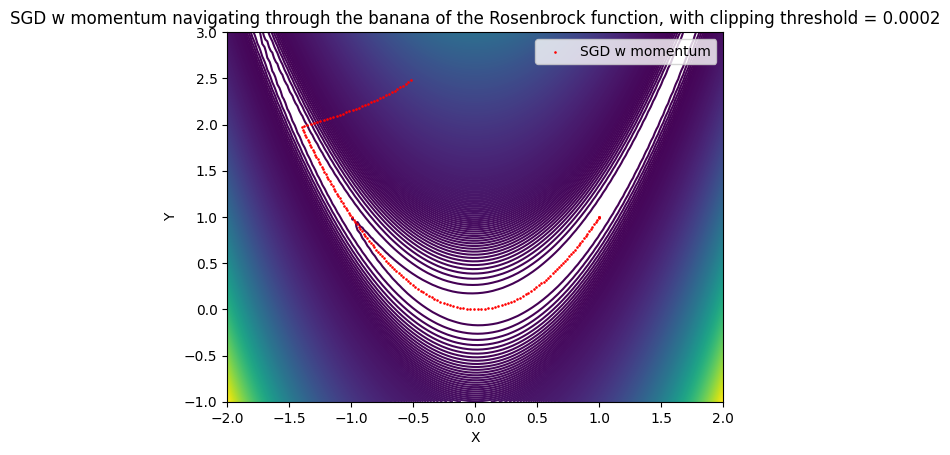

In [113]:
################
# Solution 2.4 # - Plotting SGD with momentum
################

plt.contour(X, Y, rosenbrock_values, levels=666, zorder=-1)
plt.scatter(SGD_w_momentum_path_x, SGD_w_momentum_path_y, c="red", zorder=1, label="SGD w momentum", s=0.75)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("SGD w momentum navigating through the banana of the Rosenbrock function, with clipping threshold = 0.0002")
plt.legend()
plt.show()

## What differences do you observe between the three algorithms and how would you explain them?

- Adam is able to converge much much quicker! This is probably because of the adaptive nature of the algorithm.
- The normal SGD jumps around the minimum a little bit before finally meeting it after 259726 iterations. 
- The SGD w momentum also needed clipping, but it was definitely faster with 180435 iterations.
- Both variants of SGD suffered from extreme exploding gradients in our tests, so we had to finetune the clipping parameter, because for bigger clipping threshold values, the loss would be constant after a while. Adam on the other hand did not need that.
- Since we deploying heavy use of clipping, we essentially forbid the SGD to jump around, so this is a difference that we can see when using Adam, as Adam starts out quite curvy. But here, Adam is able to adjust its direction and step size very well.

## 3 Clustering Neural Networks (3 points)

In this exercise you will learn how to run your code on a GPU in the SIC-cluster. While there is no software project for the NNIA course, you may need to work with clusters for your thesis, so this a good opportunity to practice. Of course there is also Google Colab but it has a runtime limit and will kick you out if go over it.
Note that your submission must be executable on the cluster to be eligible for grading. That is, your zip file must include all the necessary files to run your code on the cluster. It is currently very tricky to run notebooks on the cluster, so please use python scripts instead.
1. We have prepared a template repo, that allows you to get started on the cluster quickly. You can find it [here](https://gitlab.cs.uni-saarland.de/mara00002/torch-condor-template). Please follow the instructions in the readme to get started.
2. Load the FashionMNIST dataset and split it into train-, validation- and test set. You do not need to write your own dataset or dataloader classes. The torchvision package already provides a pre-defined dataset class that works with the default dataloader. You can find the documentation [here](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html).
3.  Next, train a feed forward neural network to classify the images in the dataset. Your network should have at least 2 hidden layers and 500.000 parameters. Train the network for 10 epochs and report the accuracy on the train-, validation- and test set. Use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) as your optimizer.

# 3 NOT IMPLEMENTED